# Biodiversity in National Parks

`Goal:` investigate the dataset about Biodiversity in National Parks.

`Questions to answer:`
1. What is the distribution of conservation_status for animals?
2. Are certain types of species more likely to be endangered?
3. What National Park has the most species in it?
4. Which species were spotted the most at each park?

In [1]:
# Importing the most important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status

In [2]:
# Importing and exploring species dataset
species = pd.read_csv('species_info.csv')

print(species.head(), '\n')
print(species.columns, '\n')
print(species.info(), '\n')
print(species.describe(include='all'),'\n')
print(species.isna().sum(),'\n')
print(species.conservation_status.unique(), '\n')

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN   

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               

#### observations

The `observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [7]:
# Importing and exploring observations dataset
df_observations = pd.read_csv('observations.csv')

print(df_observations.head(), '\n')
print(df_observations.columns, '\n')
print(df_observations.info(), '\n')
print(df_observations.describe(include='all'), '\n')
print(df_observations.isna().sum(), '\n')

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85 

Index(['scientific_name', 'park_name', 'observations'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None 

         scientific_name                            park_n

### #1. What is the distribution of conservation_status for animals?

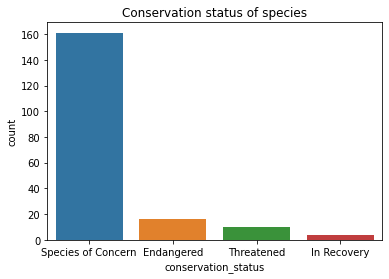

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


In [4]:
species_no_nan = species.dropna()
sns.countplot(x='conservation_status', data=species_no_nan)
plt.title('Conservation status of species')
plt.show()
print(species_no_nan.conservation_status.value_counts())

### #2. Are certain types of species more likely to be endangered?

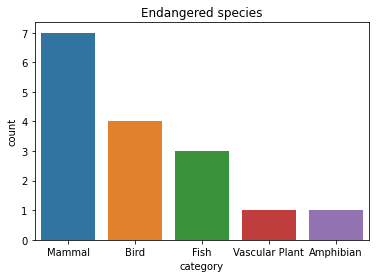

In [5]:
endangered = species_no_nan[species_no_nan.conservation_status == 'Endangered']
sns.countplot(x='category', data=endangered)
plt.title('Endangered species')
plt.show()

### #3. What National Park has the most species in it?

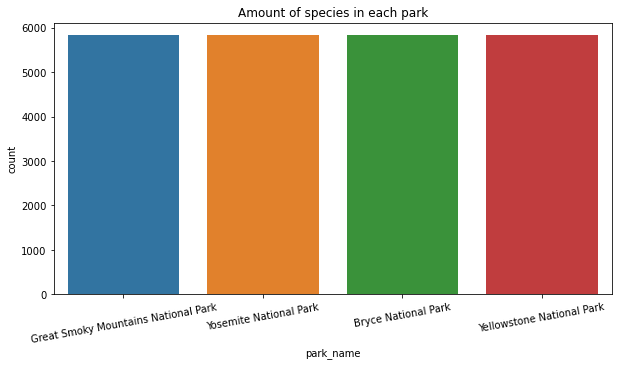

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x='park_name', data=df_observations)
plt.xticks(rotation=10)
plt.title('Amount of species in each park')
plt.show()

### #4. Which species were spotted the most at each park?

['Sonchus asper ssp. asper', 'Ivesia shockleyi var. shockleyi', 'Valerianella radiata', 'Lycopodium tristachyum']
[147, 223, 176, 321]


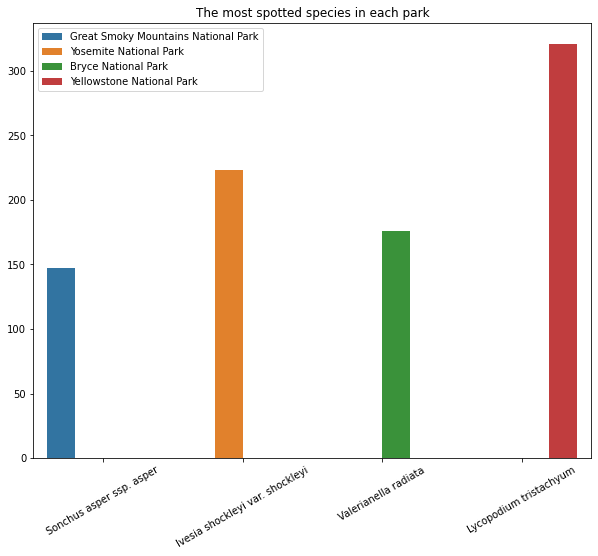

In [9]:
# Finding what species were spotted the most in each park
parks = df_observations.park_name.unique()
species_list = []
max_list = []
for park in parks:
    data = df_observations[df_observations.park_name == park]
    max_v = data.observations.max()
    spicies_v = data[data.observations == max_v]
    max_list.append(max_v)
    species_list.append(spicies_v.iloc[0]['scientific_name'])
print(species_list)
print(max_list)

#Creating barplot to communicate the findings
plt.figure(figsize=(10, 8))
sns.barplot(x=species_list, y=max_list, hue=parks)
plt.xticks(rotation=30)
plt.title('The most spotted species in each park')
plt.show()

## `Conclusion`

#### #1. What is the distribution of conservation_status for animals?

Among species about whom we have conservation_status, most of them(161) are in 'Species of Concern' group. Others are in much smaller groups, Endangered(16), Threatened(10), in Recovery(4).

#### #2. Are certain types of species more likely to be endangered?

Yes, mammals and birds are more likely to be endangered than amphibians and vascular plants.

#### #3. What National Park has the most species in it?

All parks have tha equal amount of species in it - 5824 species

#### #4. Which species were spotted the most at each park?

The most spotted species is 'Lycopodium tristachyum'(plant), it located in Yellowstone National Park and was spotted 321 times.